### Plotting Robot Motion (right angle only)


In [4]:
from matplotlib import pyplot as plt

class Vehicle:
    def __init__(self):
        """
        Creates new vehicle at (0,0) with a heading pointed East.
        """
        self.x       = 0 # meters
        self.y       = 0
        self.heading = "E" # Can be "N", "S", "E", or "W"
        self.history = []
        
    # TODO-1 - Implement this function 
    def drive_forward(self, displacement):
        """
        Updates x and y coordinates of vehicle based on 
        heading and appends previous (x,y) position to
        history.
        """
        
        # this line appends the current (x,y) coordinates
        # to the vehicle's history. Useful for plotting 
        # the vehicle's trajectory. You shouldn't need to
        # change this line.
        self.history.append((self.x, self.y))
        
        # vehicle currently pointing east...
        if   self.heading == "E":
            self.x += displacement
        
        # north
        elif self.heading == "N":
            self.y += displacement
        
        # west
        elif self.heading == "W":
            self.x -= displacement
        
        # south
        else:
            self.y -= displacement
        
    def turn(self, direction):
        if direction == "L":
            self.turn_left()
        elif direction == "R":
            self.turn_right()
        else:
            print("Error. Direction must be 'L' or 'R'")
            return
        
    def turn_left(self):
        """
        Updates heading (for a left turn) based on current heading
        """
        next_heading = {
            "N" : "W",
            "W" : "S",
            "S" : "E",
            "E" : "N",
        }
        self.heading = next_heading[self.heading]
        
    
    # TODO-2 - implement this function
    def turn_right(self):
        next_heading = {
            "N" : "E",
            "W" : "N",
            "S" : "W",
            "E" : "S",
        }
        self.heading = next_heading[self.heading]
            
    def show_trajectory(self):
        """
        Creates a scatter plot of vehicle's trajectory.
        """
        X = [p[0] for p in self.history]
        Y = [p[1] for p in self.history]
        
        X.append(self.x)
        Y.append(self.y)
        
        plt.scatter(X,Y)
        plt.plot(X,Y)
        plt.show()

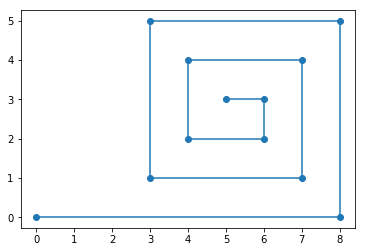

Nice job! Your vehicle is behaving as expected!


In [5]:
# TESTING CODE 1

# instantiate vehicle
v = Vehicle()

# drive in spirals of decreasing size
v.drive_forward(8)
v.turn("L")

v.drive_forward(5)
v.turn("L")

v.drive_forward(5)
v.turn("L")

v.drive_forward(4)
v.turn("L")

v.drive_forward(4)
v.turn("L")

v.drive_forward(3)
v.turn("L")

v.drive_forward(3)
v.turn("L")

v.drive_forward(2)
v.turn("L")

v.drive_forward(2)
v.turn("L")

v.drive_forward(1)
v.turn("L")

v.drive_forward(1)

# show the trajectory. It should look like a spiral
v.show_trajectory()

# TESTING
assert(v.x == 5)
assert(v.y == 3)
first_5 = [
    (0, 0),
    (8, 0),
    (8, 5),
    (3, 5),
    (3, 1)
]
assert(first_5 == v.history[:5])
print("Nice job! Your vehicle is behaving as expected!")

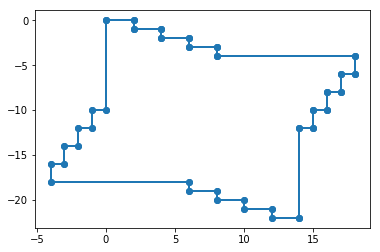

Nice job! Your vehicle passed the zig zag test.


In [6]:
# TESTING CODE Part 2
def test_zig_zag():
    v = Vehicle()
    for i in range(10):
        for _ in range(4):
            v.drive_forward(2)
            v.turn("R")
            v.drive_forward(1)
            v.turn("L")
        v.drive_forward(10)
        v.turn("R")
    first_six = [
        (0,0),
        (2,0),
        (2,-1),
        (4,-1),
        (4,-2),
        (6,-2)
    ]
    v.show_trajectory()
    assert(v.x == 14)
    assert(v.y == -22)
    assert(v.history[:6] == first_six)
    print("Nice job! Your vehicle passed the zig zag test.")
test_zig_zag()

### Trigonometric Ratios

<img src='./figs/trig.png'>

In [7]:
import numpy as np
from math import pi
from matplotlib import pyplot as plt

# these 2 lines just hide some warning messages.
import warnings
warnings.filterwarnings('ignore')

class Vehicle:
    def __init__(self):
        self.x       = 0.0 # meters
        self.y       = 0.0
        self.heading = 0.0 # radians
        self.history = []
        
    def drive_forward(self, displacement):
        """
        Updates x and y coordinates of vehicle based on 
        heading and appends previous (x,y) position to
        history.
        """
        delta_x = displacement * np.cos(self.heading)
        delta_y = displacement * np.sin(self.heading)
        
        new_x = self.x + delta_x
        new_y = self.y + delta_y
        
        self.history.append((self.x, self.y))

        self.x = new_x
        self.y = new_y
    
    def set_heading(self, heading_in_degrees):
        """
        Set's the current heading (in radians) to a new value
        based on heading_in_degrees. Vehicle heading is always
        between -pi and pi.
        """
        assert(-180 <= heading_in_degrees <= 180)
        rads = (heading_in_degrees * pi / 180) % (2*pi)
        self.heading = rads
        
    def turn(self, degrees):
        rads = (degrees * pi / 180)
        new_head = self.heading + rads % (2*pi)
        self.heading = new_head
    
    def show_trajectory(self):
        """
        Creates a scatter plot of vehicle's trajectory.
        """
        # get the x and y coordinates from vehicle's history
        X = [p[0] for p in self.history]
        Y = [p[1] for p in self.history]
        
        # don't forget to add the CURRENT x and y
        X.append(self.x)
        Y.append(self.y)
        
        # create scatter AND plot (to connect the dots)
        plt.scatter(X,Y)
        plt.plot(X,Y)
        
        plt.title("Vehicle (x, y) Trajectory")
        plt.xlabel("X Position")
        plt.ylabel("Y Position")
        plt.axes().set_aspect('equal', 'datalim')
        plt.show()

In [10]:
# Use this testing code to check your code for correctness.
from src.testing import test_drive_forward, test_set_heading

test_set_heading(Vehicle)
test_drive_forward(Vehicle)

Your set_heading function looks good!
Congratulations! Your vehicle's drive_forward method works


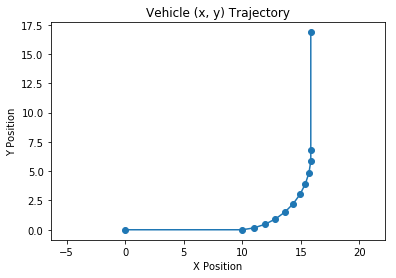

In [9]:
# instantiate vehicle
v = Vehicle()

# drive forward 10 meters
v.drive_forward(10)

# turn left in 10 increments of 9 degrees each.
for _ in range(10):
    v.turn(9.0)
    v.drive_forward(1)

v.drive_forward(10)

v.show_trajectory()